In [ ]:
# Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [ ]:
# Load dataset

In [6]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
# Summary statistics

In [10]:
df.describe(include="all")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [12]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
# Plot score distributions

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, col in zip(axes, ['math score', 'reading score', 'writing score']):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
plt.tight_layout()

In [ ]:
# Compare math score by gender

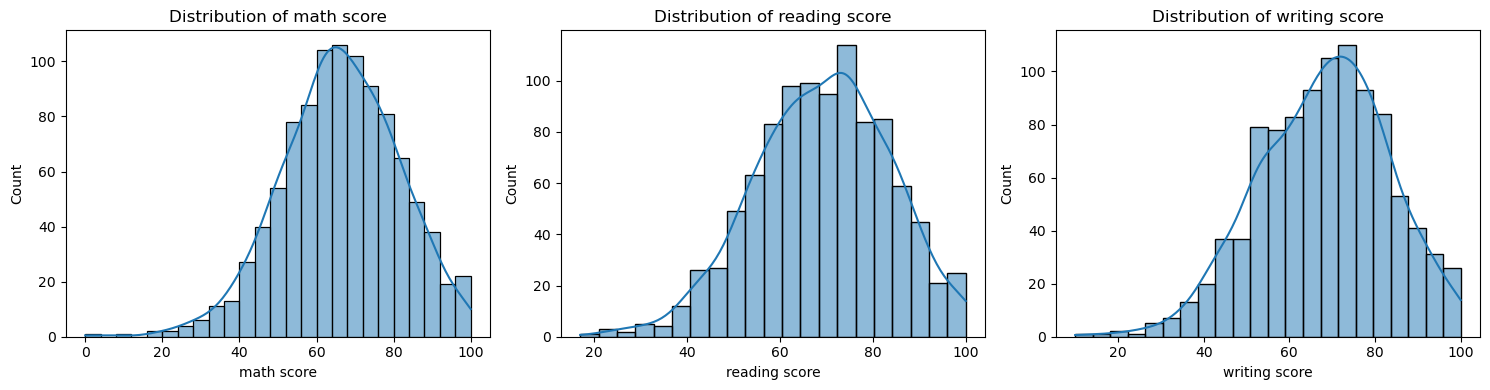

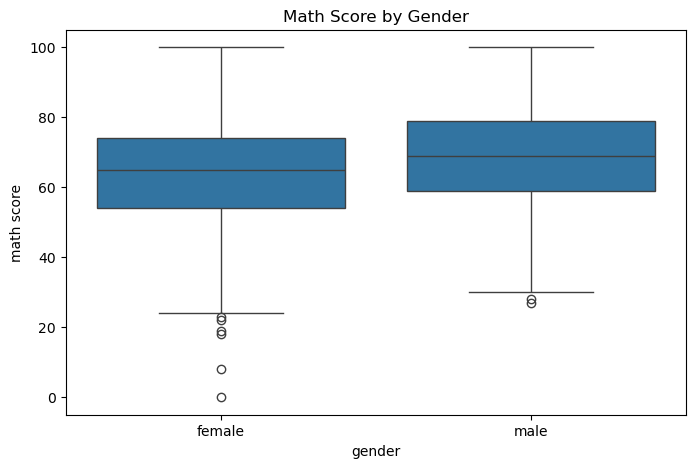

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='gender', y='math score')
plt.title('Math Score by Gender')
plt.show()

In [ ]:
# Reading score by test preparation course

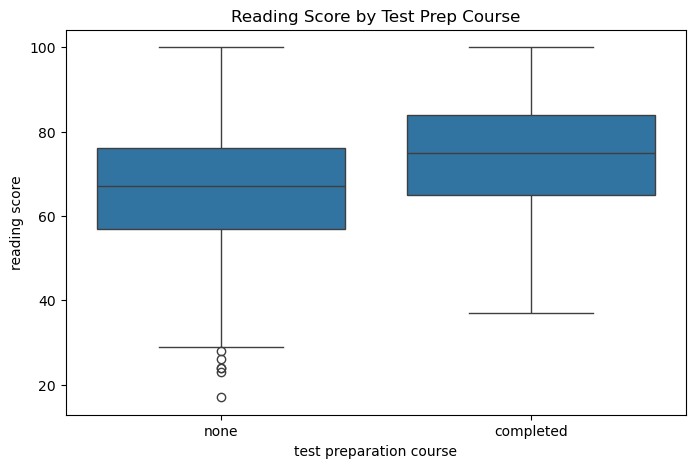

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='test preparation course', y='reading score')
plt.title('Reading Score by Test Prep Course')
plt.show()

In [ ]:
# Math score by parental level of education

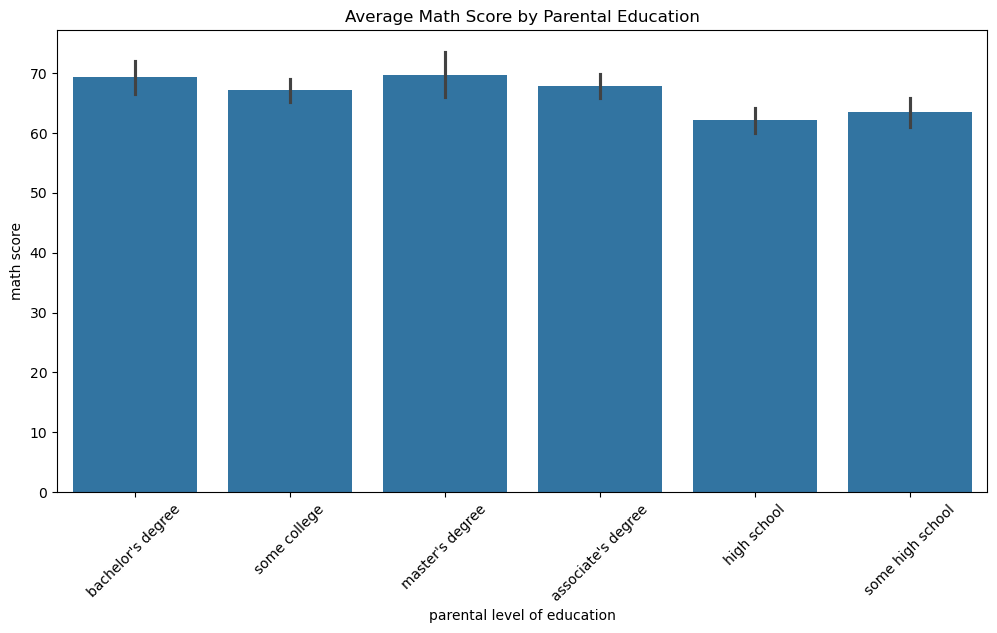

In [20]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='parental level of education', y='math score', estimator=np.mean)
plt.xticks(rotation=45)
plt.title('Average Math Score by Parental Education')
plt.show()

In [ ]:
# Correlation between scores

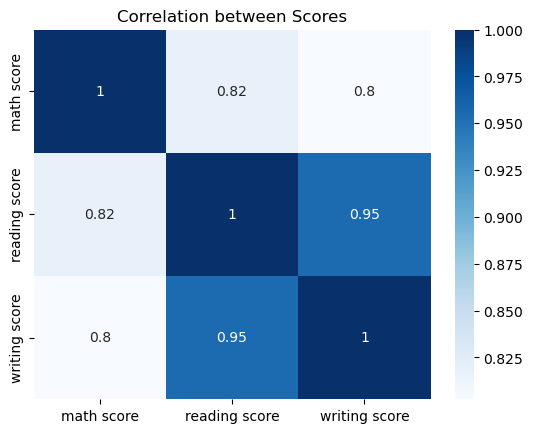

In [22]:
corr = df[['math score', 'reading score', 'writing score']].corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation between Scores')
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [26]:
X = df.drop(columns=['math score'])
y = df['math score']

In [28]:
categorical = X.select_dtypes(include='object').columns
numeric = X.select_dtypes(exclude='object').columns

In [30]:
preprocess = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), categorical),
    ('num', 'passthrough', numeric)
])

In [38]:
model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('rf', RandomForestRegressor(n_estimators=200, random_state=42))
])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')),
                                                 ('num', 'passthrough',
                                                  Index(['reading score', 'writing score'], dtype='object'))])),
                ('rf',
                 RandomForestRegressor(n_estimators=200, random_state=42))])

In [44]:
preds = model.predict(X_test)

In [46]:
print("MAE:", mean_absolute_error(y_test, preds))
print("R² Score:", r2_score(y_test, preds))

MAE: 4.684338095238095
R² Score: 0.852028674791384


In [ ]:
# Feature importance

In [48]:
importances = model.named_steps['rf'].feature_importances_
feature_names = model.named_steps['preprocess'].get_feature_names_out()
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(10)

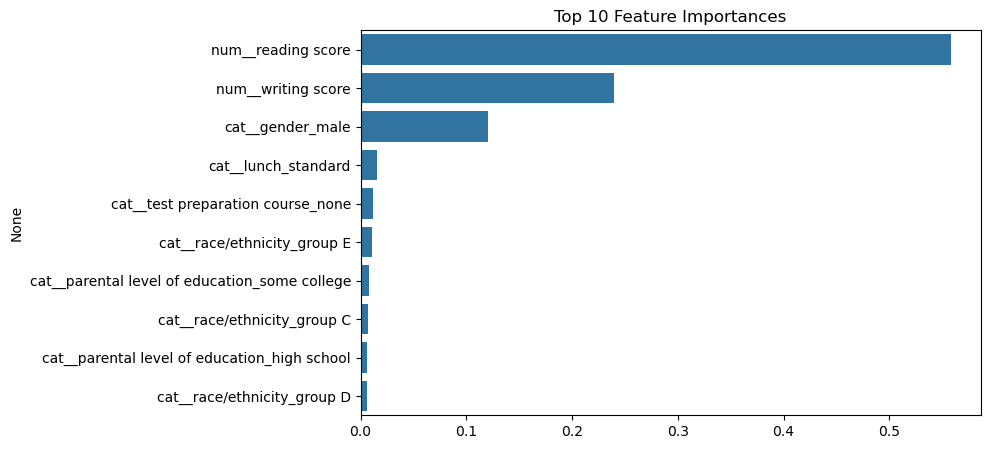

In [50]:
plt.figure(figsize=(8, 5))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Top 10 Feature Importances")
plt.show()

In [6]:
import pandas as pd
import numpy as np

In [8]:
df_students = pd.read_csv('StudentsPerformance.csv')

In [10]:
df_students.columns = df_students.columns.str.replace(' ', '_').str.lower()

In [12]:
df_students['average_score'] = df_students[['math_score', 'reading_score', 'writing_score']].mean(axis=1)

In [14]:
print("DataFrame 'df_students' has been reloaded and preprocessed.")
print(df_students.head().to_markdown(index=False, numalign="left", stralign="left"))

DataFrame 'df_students' has been reloaded and preprocessed.
| gender   | race/ethnicity   | parental_level_of_education   | lunch        | test_preparation_course   | math_score   | reading_score   | writing_score   | average_score   |
|:---------|:-----------------|:------------------------------|:-------------|:--------------------------|:-------------|:----------------|:----------------|:----------------|
| female   | group B          | bachelor's degree             | standard     | none                      | 72           | 72              | 74              | 72.6667         |
| female   | group C          | some college                  | standard     | completed                 | 69           | 90              | 88              | 82.3333         |
| female   | group B          | master's degree               | standard     | none                      | 90           | 95              | 93              | 92.6667         |
| male     | group A          | associate's degree          

In [16]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
X = df_students[['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'reading_score', 'writing_score']]
y = df_students['math_score']

In [20]:
X = pd.get_dummies(X, columns=['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'], drop_first=True)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
base_estimator = DecisionTreeRegressor(max_depth=4)

In [26]:
adaboost_model = AdaBoostRegressor(estimator=base_estimator, n_estimators=100, random_state=42)
adaboost_model.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=100, random_state=42)

In [28]:
y_pred_adaboost = adaboost_model.predict(X_test)

In [30]:
r2_adaboost = r2_score(y_test, y_pred_adaboost)
mae_adaboost = mean_absolute_error(y_test, y_pred_adaboost)
mse_adaboost = mean_squared_error(y_test, y_pred_adaboost)
rmse_adaboost = np.sqrt(mse_adaboost)

In [32]:
print("\nAdaBoost Regressor Model Performance:")
print(f"R-squared (R2): {r2_adaboost:.4f}")
print(f"Mean Absolute Error (MAE): {mae_adaboost:.2f}")
print(f"Mean Squared Error (MSE): {mse_adaboost:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_adaboost:.2f}")


AdaBoost Regressor Model Performance:
R-squared (R2): 0.8498
Mean Absolute Error (MAE): 4.81
Mean Squared Error (MSE): 36.56
Root Mean Squared Error (RMSE): 6.05


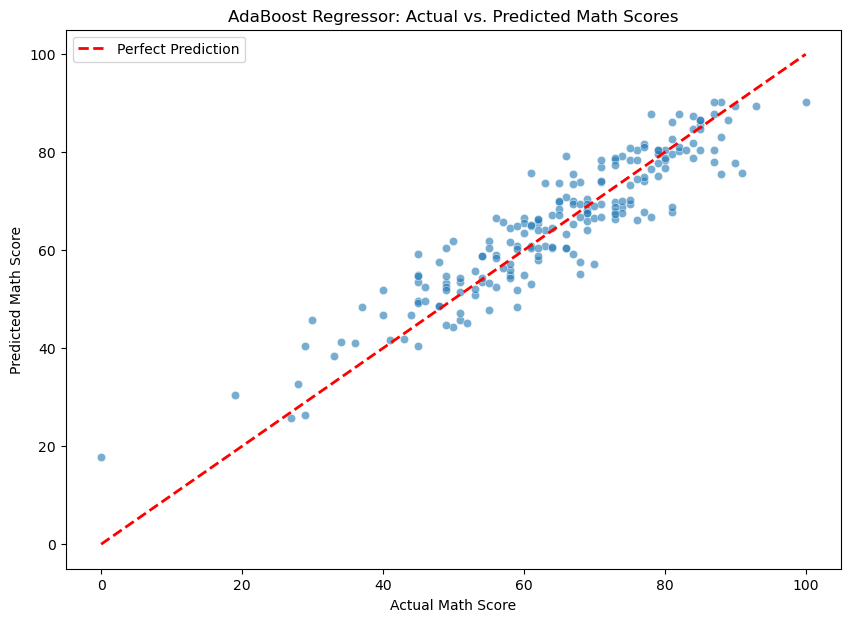

In [34]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test, y=y_pred_adaboost, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2, label='Perfect Prediction')
plt.title('AdaBoost Regressor: Actual vs. Predicted Math Scores')
plt.xlabel('Actual Math Score')
plt.ylabel('Predicted Math Score')
plt.legend()
plt.show()